In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import copy

import tensorflow as tf
from tensorflow import keras
from keras import models as kmod
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
FILE_PATH = "/content/drive/MyDrive/Master_AI/AIVP/Project/Data/mdi_modified.csv"#apple_samsung.csv"
IMG_PATH = "/content/drive/MyDrive/Master_AI/AIVP/Project/Data/mobile_images/"
#SAVE_PATH = "/content/drive/MyDrive/Master_AI/AIVP/Project/Data/apple_samsung_img.csv"

In [3]:
df = pd.read_csv(FILE_PATH, error_bad_lines=False)
df = df.reset_index(drop=True)

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
#def splitt_dataset(dataset):
  #Get the specific train and test datasets
train_df = df.loc[df['Usage'] == 'Training']
valid_df = df.loc[df['Usage'] == 'Validation']
test_df = df.loc[df['Usage'] == 'Testing']
#return train, valid, test

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7624 entries, 0 to 10101
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         7624 non-null   object
 1   Model         7624 non-null   object
 2   Usage         7624 non-null   object
 3   Brand         7624 non-null   object
 4   Brand_id      7624 non-null   int64 
 5   Condition     7624 non-null   object
 6   Condition_id  7624 non-null   int64 
 7   Image_File    7624 non-null   object
dtypes: int64(2), object(6)
memory usage: 536.1+ KB


In [16]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 19 to 10094
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         1241 non-null   object
 1   Model         1241 non-null   object
 2   Usage         1241 non-null   object
 3   Brand         1241 non-null   object
 4   Brand_id      1241 non-null   int64 
 5   Condition     1241 non-null   object
 6   Condition_id  1241 non-null   int64 
 7   Image_File    1241 non-null   object
dtypes: int64(2), object(6)
memory usage: 87.3+ KB


In [ ]:
df.head()

In [19]:
df.insert(8,'data',float)

In [28]:
train_df = train_df.reset_index(drop=True)

In [6]:
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
train_df.insert(8,'data',float)
valid_df.insert(8,'data',float)

In [7]:
brands = ['Apple','Samsung','Xiaomi','Huawei','Sony','Nokia',
            'Oppo','Vivo','LG','OnePlus','Realme','Infinix','Google',
            'ZTE','Asus','HTC','E-tel','Greentel','Lenovo','Dialog',
            'Sony Ericsson','Moto','Acer','BlackBerry','China Mobile',
            'Micromax','Ag-tel','Alcatel','iPro','Zigo','Microsoft']
def thin_data(dataframe):
  brand_counter = np.zeros((2, len(brands)))

  for l_i in range(len(dataframe)):
    #(brand_counter[dataframe.at[l_i,'Condition_id']])[dataframe.at[l_i,'Brand_id']] += 1
    if(dataframe.at[l_i,'Brand'] == 'Nokia'):
      dataframe.at[l_i,'Condition_id']=-1
    if(dataframe.at[l_i,'Brand_id'] >= 7):
      dataframe.at[l_i,'Condition_id']=-1
    else:
      brand_counter[dataframe.at[l_i,'Condition_id'],dataframe.at[l_i,'Brand_id']] +=1    
      if((brand_counter[dataframe.at[l_i,'Condition_id']][dataframe.at[l_i,'Brand_id']] % 2) == 0):
        dataframe.at[l_i,'Condition_id']=-1

  #dataframe.drop( dataframe[ dataframe['Condition_id'] == -1 ].index , inplace=True)
  #dataframe = dataframe.reset_index(drop=True)


In [8]:
thin_data(train_df)
train_df.drop( train_df[ train_df['Condition_id'] == -1 ].index , inplace=True)
train_df = train_df.reset_index(drop=True)

In [9]:
thin_data(valid_df)
valid_df.drop( valid_df[ valid_df['Condition_id'] == -1 ].index , inplace=True)
valid_df = valid_df.reset_index(drop=True)

In [12]:
valid_df["Brand"].value_counts()

Apple      254
Samsung    164
Xiaomi      49
Huawei      45
Sony        32
Nokia       20
Oppo        19
Vivo        13
LG           9
OnePlus      8
Name: Brand, dtype: int64

In [ ]:
valid_df.head(25)

In [ ]:
for i in range(len(df.index)):
  #try:
  img = mpimg.imread(IMG_PATH+df.iloc[i]["Image_File"])
  df.at[i,'data'] = img
  if((i%100) == 0):
    print(i)
  #except:
  #  df.at[i,'Condition_id']=-1
  #  print('fail at ' + str(i))
  #  continue

In [10]:
for i in range(len(train_df.index)):
  try:
    img = mpimg.imread(IMG_PATH+train_df.iloc[i]["Image_File"])
    train_df.at[i,'data']= img
    if((i%100) == 0):
      print(i)
  except:
    train_df.at[i,'Condition_id']=-1
    print('fail at ' + str(i))
    continue

0
fail at 66
100
200
fail at 257
300
fail at 338
fail at 340
fail at 341
400
500
600
fail at 664
700
800
900
1000
1100
1200
1300
1400
1500
1600
fail at 1689
1700
fail at 1794
1800
1900
fail at 1992
fail at 1993
fail at 1996
2000
fail at 2003
fail at 2096
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
fail at 3067
fail at 3075
3100
3200
3300


In [11]:
for i in range(len(valid_df.index)):
  try:
    img = mpimg.imread(IMG_PATH+valid_df.iloc[i]["Image_File"])
    valid_df.at[i,'data']= img
    if((i%100) == 0):
      print(i)
  except:
    valid_df.at[i,'Condition_id']=-1
    print('fail at ' + str(i))
    continue

0
fail at 87
100
200
300
fail at 330
400
500


In [ ]:
df.drop( df[ df['Condition_id'] == -1 ].index , inplace=True)

In [12]:
train_df.drop( train_df[ train_df['Condition_id'] == -1 ].index , inplace=True)
valid_df.drop( valid_df[ valid_df['Condition_id'] == -1 ].index , inplace=True)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [ ]:
train_df.head(25)

In [ ]:
df = df[df['Condition_id'] != -1]

In [ ]:
df.to_csv(SAVE_PATH)

In [ ]:
plt.imshow(df.at[1,'data'])

In [13]:
def split_to_LaD(dataframe):
  labels_list = dataframe.pop('Brand_id')
  images_list = dataframe.pop('data')
  return images_list, labels_list

def df_LaD_to_arry(images_list,labels_list):

  images = np.reshape((images_list[0][:100,:140,:]),(1,100,140,3))
  labels = np.reshape(labels_list[0],1)
  for i in range(1,len(images_list)):
    #try:
    image = np.reshape((images_list[i][:100,:140,:]),(1,100,140,3))
    label = np.reshape(labels_list[i],1)
    #print(labels.shape)
    images = np.append(images,image, axis = 0)
    labels = np.append(labels,label)
    #except:
    #  continue

  images = images.astype(np.float)
  images = images / 255.0
  labels = labels.astype(np.float)

  return images, labels


In [14]:
tr_ll, tr_il =  split_to_LaD(train_df)
va_ll, va_il =  split_to_LaD(valid_df)

In [15]:
images, labels = df_LaD_to_arry(tr_ll, tr_il)
val_images, val_labels = df_LaD_to_arry(va_ll, va_il)

In [ ]:
train_labels_list = train_df.pop('Brand_id')
train_images_list = train_df.pop('data')

In [ ]:
images

In [ ]:
plt.imshow(images.at[0])

In [ ]:
plt.imshow(images.at[1])

In [ ]:
images[0].shape

In [ ]:
for i in range(len(images)):
  try:
    print(images[i].shape)
  except:
    continue

In [23]:
labels

array([0., 1., 9., ..., 2., 4., 1.])

In [ ]:
images[1].shape

(107, 142, 3)

In [ ]:
images[2].shape

(107, 142, 3)

In [ ]:
images2 = np.stack((images_list[0][:100,:140,:], images_list[1][:100,:140,:], images_list[2][:100,:140,:]), axis = 0)


In [ ]:
imgasd = np.reshape((images_list[1][:100,:140,:]),(1,100,140,3))

In [ ]:
labels_list[7]

0

In [ ]:
images = np.reshape((images_list[0][:100,:140,:]),(1,100,140,3))
labels = np.reshape(labels_list[0],1)
for i in range(1,len(images_list)):
  try:
    image = np.reshape((images_list[i][:100,:140,:]),(1,100,140,3))
    label = np.reshape(labels_list[i],1)
    print(label.shape)
    images = np.append(images,image, axis = 0)
    labels = np.append(labels,label)
    print('d')
    print(i)
  except:
    continue

In [ ]:
images.shape

(1260, 100, 140, 3)

In [ ]:
labels = np.reshape(labels, (len(labels),1))

In [ ]:
labels

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [16]:
train_set = tf.data.Dataset.from_tensor_slices((images.reshape(len(labels),100,140,3),labels)).shuffle(1000).batch(32)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import models as kmod
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [17]:
def model_VGG():
  model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(100, 140, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax'),
    ])
  return model, 'VGG'

In [18]:
model_vgg = model_VGG()

model_vgg[0].compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits = False),#loss='mse',
              metrics=['accuracy'])

In [21]:
print(model_vgg[0].summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 140, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 140, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 70, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 70, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 70, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 35, 32)       0         
 2D)                                                    

In [19]:
history = (model_vgg[0].fit(train_set,#train_images, train_labels,
                               epochs = 50,
                               validation_data = (val_images.reshape(len(val_labels),100,140,3),val_labels),
                               callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10, restore_best_weights = True)))

Epoch 1/50
106/106 [==============================] - 10s 72ms/step - loss: 1.4522 - accuracy: 0.4278 - val_loss: 1.4262 - val_accuracy: 0.4510
Epoch 2/50
106/106 [==============================] - 7s 62ms/step - loss: 1.3898 - accuracy: 0.4613 - val_loss: 1.3812 - val_accuracy: 0.4920
Epoch 3/50
106/106 [==============================] - 6s 61ms/step - loss: 1.3370 - accuracy: 0.5031 - val_loss: 1.3264 - val_accuracy: 0.5312
Epoch 4/50
106/106 [==============================] - 6s 61ms/step - loss: 1.2869 - accuracy: 0.5242 - val_loss: 1.4093 - val_accuracy: 0.4991
Epoch 5/50
106/106 [==============================] - 6s 60ms/step - loss: 1.2386 - accuracy: 0.5434 - val_loss: 1.3298 - val_accuracy: 0.5241
Epoch 6/50
106/106 [==============================] - 6s 61ms/step - loss: 1.1744 - accuracy: 0.5583 - val_loss: 1.4448 - val_accuracy: 0.5134
Epoch 7/50
106/106 [==============================] - 6s 61ms/step - loss: 1.0543 - accuracy: 0.5894 - val_loss: 1.6677 - val_accuracy: 0.513

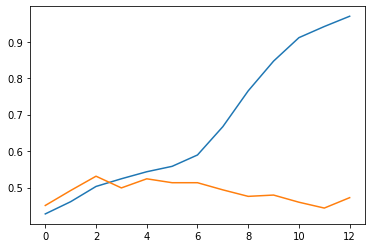

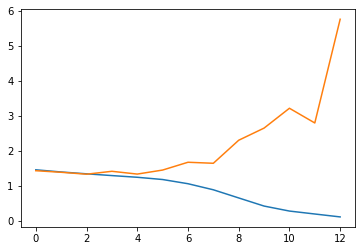

In [20]:
element = 'accuracy'

plt.plot(history.history[element], label = element + '_' + model_vgg[1])
#plt.show()
plt.plot(history.history['val_accuracy'], label = element + '_' + model_vgg[1])
plt.show()
plt.plot(history.history['loss'], label = element + '_' + model_vgg[1])
plt.plot(history.history['val_loss'], label = element + '_' + model_vgg[1])

In [ ]:
#Train all models in List
def train_models(models,epochs = 100):

  history = list()
  for i in range(len(models)):
    history.append(models[i][0].fit(train_set,#train_images, train_labels,
                               epochs = epochs,
                               validation_data = (valid_images.reshape(len(valid_features),48,48,1),valid_labels),
                               callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10, restore_best_weights = True)))

  return history

history = train_models(classification_models,100)

In [21]:
#Create the models

def model_one():
  model = Sequential([
    Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape=(100, 140, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(7)
    ])
  return model, 'EffectNet'

def model_two():
  model = Sequential([
    Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape=(100, 140, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(7)
    ])
  return model, 'NFNet'

#ZF Net
def model_ZFN():
  model = Sequential([
    Conv2D(filters = 5, 
           kernel_size = (5,5), 
           strides = 2,
           activation = 'relu', 
           input_shape=(100, 140, 3)),
    MaxPooling2D(pool_size = (3,3),
                 strides = 2),
    Conv2D(filters = 256, 
           kernel_size = (3,3), 
           activation = 'relu'),
    Conv2D(filters = 384, 
           kernel_size = (3,3), 
           activation = 'relu'),
    MaxPooling2D(pool_size = (3,3),
                 strides = 2),
    Flatten(),
    Dense(4096, activation = 'relu'),
    Dense(4096, activation = 'relu'),
    Dense(7)  
    ])
  return model, 'ZFNet'

def model_VGG():
  model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(100, 140, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax'),
    ])
  return model, 'VGG'


def model_lN5():
  model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(100, 140, 3)),
    AveragePooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    AveragePooling2D(),
    Flatten(),
    Dense(280, activation='relu'),
    Dense(196, activation='relu'),
    Dense(7, activation='softmax'),
    ])
  return model, 'CoANet'

#to autobuild all models
def build_models():
  models = list()

  models.append(model_one())
  models.append(model_two())
  models.append(model_ZFN())
  models.append(model_VGG())
  models.append(model_lN5())

  return models


classification_models = build_models()

In [22]:
#compile all models
def comp_models(models,f_log):

  for i in range(len(models)):
    models[i][0].compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits = f_log[i]),#loss='mse',
              metrics=['accuracy'])

  return models

models = comp_models(classification_models,[True,True,True,False,False])

In [23]:
#print model summeries
def print_models(models):

  for i in range(len(models)):
    print(models[i][0].summary())
  return

print_models(classification_models)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 100, 140, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 70, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 70, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 35, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 17, 64)      

In [24]:
#Train all models in List
def train_models(models,epochs = 100):

  history = list()
  for i in range(len(models)):
    history.append(models[i][0].fit(train_set,#train_images, train_labels,
                               epochs = epochs,
                               validation_data = (val_images.reshape(len(val_labels),100,140,3),val_labels),
                               callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10, restore_best_weights = True)))

  return history

history = train_models(classification_models,100)

Epoch 1/100
106/106 [==============================] - 4s 30ms/step - loss: 1.4231 - accuracy: 0.4755 - val_loss: 1.3677 - val_accuracy: 0.4742
Epoch 2/100
106/106 [==============================] - 3s 28ms/step - loss: 1.2852 - accuracy: 0.5274 - val_loss: 1.3709 - val_accuracy: 0.4456
Epoch 3/100
106/106 [==============================] - 3s 27ms/step - loss: 1.1996 - accuracy: 0.5420 - val_loss: 1.3449 - val_accuracy: 0.5134
Epoch 4/100
106/106 [==============================] - 3s 27ms/step - loss: 1.0465 - accuracy: 0.6095 - val_loss: 1.5012 - val_accuracy: 0.5205
Epoch 5/100
106/106 [==============================] - 3s 27ms/step - loss: 0.8458 - accuracy: 0.6828 - val_loss: 1.6204 - val_accuracy: 0.4955
Epoch 6/100
106/106 [==============================] - 3s 28ms/step - loss: 0.6221 - accuracy: 0.7705 - val_loss: 1.8735 - val_accuracy: 0.4902
Epoch 7/100
106/106 [==============================] - 3s 28ms/step - loss: 0.4140 - accuracy: 0.8562 - val_loss: 2.5293 - val_accuracy:

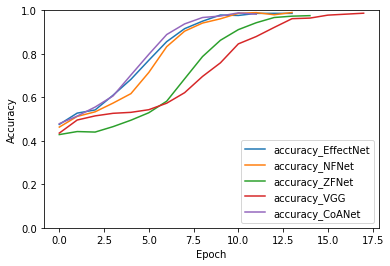

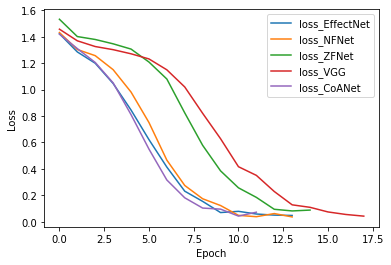

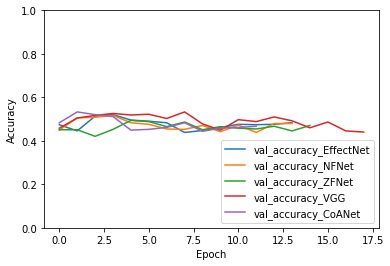

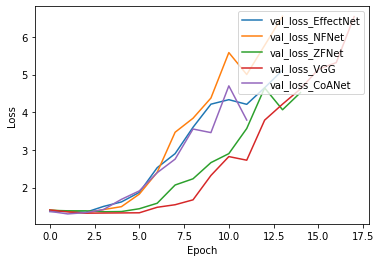

In [25]:
#Plot the accuracy on the training history of the different models
def plot_history(history,element, isAcc = True, isLeUp = False):
  figure = plt.figure(figsize=(6, 4))
  for i in range(len(history)):
    plt.plot(history[i].history[element], label = element + '_' + models[i][1])
  plt.xlabel('Epoch')
  if isAcc :
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1])
    plt.legend(loc='lower right')
  else:
    plt.ylabel('Loss')
  if isLeUp :
    plt.legend(loc='upper right')
  else:
    plt.legend(loc='lower right')


plot_history(history,'accuracy')
plot_history(history,'loss',False,True)
plot_history(history,'val_accuracy')
plot_history(history,'val_loss',False,True)